In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt  
import numpy as np
import os,sys
caffe_root = os.environ["CAFFE_ROOT"]
os.chdir(caffe_root)                     
print caffe_root                         
sys.path.insert(0, caffe_root + 'python')
import caffe                                                                      
caffe.set_mode_gpu()                     
caffe.set_device(1)                      

dir_t = "/home/maohz12/pruning/2_results/kmeans/alexnet/"

/home/maohz12/pruning/


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [2]:
accu_top1 = numpy.load(dir_t + 'accu_top1.npz.npy')
accu_top5 = numpy.load(dir_t + 'accu_top5.npz.npy')
prototxt = '/home/maohz12/pruning/3_prototxt_solver/L2/train_val.prototxt'  
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/alexnet.caffemodel' 
net = caffe.Net(prototxt, caffemodel, caffe.TEST)

layers = filter(lambda x:'conv' in x or 'fc' in x or 'ip' in x, net.params.keys()) 
bits_list = np.array([2,3,4,6,8])                                                              

conv1


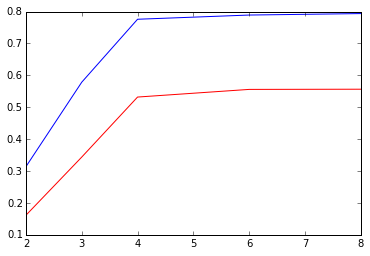

conv2


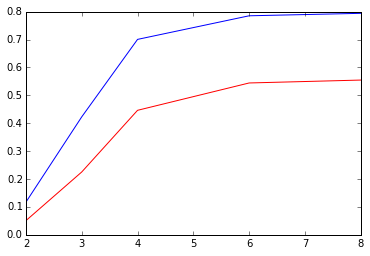

conv3


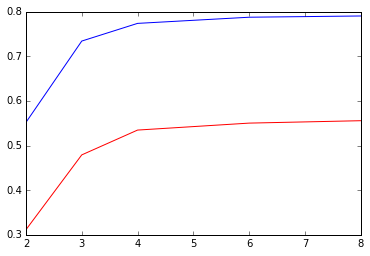

conv4


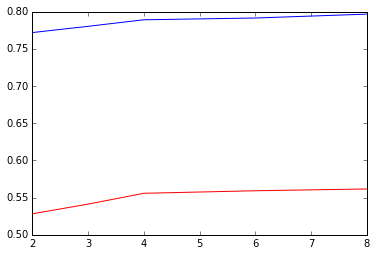

conv5


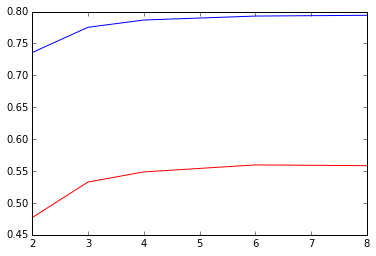

fc6


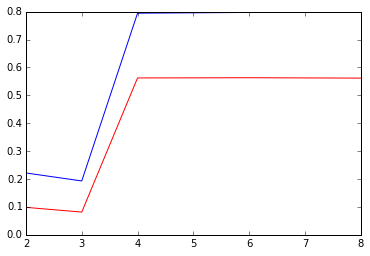

fc7


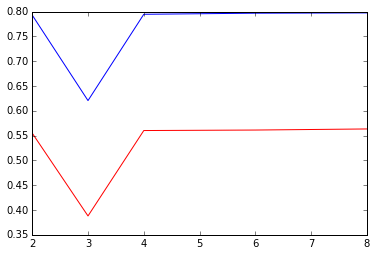

fc8


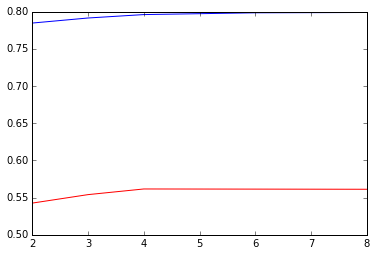

In [3]:
for i, layer in enumerate(layers):
    print layer
    plt.plot(bits_list, accu_top1[i], c='red')
    plt.plot(bits_list, accu_top5[i], c='blue')
    plt.show()